Introduction to Convolutional Neural Networks (CNNs)
=========

Convolutional neural networks (CNNs, aka ConvNets) exploit the spatial information in input stimuli (e.g. 2D images), instead of using input as a lineral vector of numbers.
The CNN architecture is inspired by the topology and function of the visual cortex, in which a hierarchy of layers process visual information in an incremental way. E.g. our brain starts from the recognition of on/off pixels, then their grouping into lines, their subsequent combination is simple 2D shapes, up to the recognition of compelx 3D shapes and objects.

Specifically, a deep CNN consists of many stacked layers. There are two main types of layers, convolutional and pooling, which typically alternate. 

An important principle of the convolution layer is that of receptive fields. That is, a 2D subregion (submatrix) of the input image (matrix) is connected to one hidden unit, and this subregion corresponds to the receptive field of this hidden unit. The next hidden unit will have a receptive field from the adjactent (or partially overlapping) subregion of the input matrix. This corresponds to the convolution mechanism. In Keras, the size of each submatrix is called __kernel size__. This is one of the key hyperparameters in CNNs. 

For example, with an MNIST image of 28x28 pixels, and a receptive field (kernel size) of 5x5 pixles feeding into a single hidden unit, and with a shifting of the subregion by 1 pixel (stride length), the next hidden layer will constitute a (feature) map of 23x23 units.

Each input matrix or hidden layer can be connected to multiple __feature maps__ in the next hidden layer. All the neurons in the hidden layer of each feature map will share the same weights and biases. This way each feature map layer learns a set of position-independent latent features derived from the image. 

The pooling (aka sub-sampling) mechanism is used to group (pool) together the output of a fetaure map. This can be done with Max Pooling (where the highest value of the pooling units is used in the next hidden unit) or Average Pooling (where the average value of the subregion activations is computed). 


**LeNet for MNIST**

One of the pioneering works in Deep Learning and CNN was the original model by Yann LeCun and colleagues (see: Y. LeCun and Y. Bengio, 1995, "Convolutional Networks for Images, Speech, and Time-Series". Brain theory neural networks, vol. 3361). This is referred to as the LeNet. This LeNet was for example used on the MNIST problem, to show the robustness to simple geometric transformations and distortion of the handwritten code. Here we will look at the Keras code for the LeNet on MNIST dataset.

In this exercise we will implemente the code for the specific LeNet network.

**2D Convolution module**

The definition of a convolution module has this format:

__keras.layers.convolutional.Conv2D(filters, kernel_size, padding='valid')__


It requires the following parameters:
- __filters__, the number of convolution kernels to use (i.e. dimensionality of the output)
- __kernel_size__, with two integers specifying the width and height of the 2D convolution window (or a single integer to specify the same value for all spatial dimensions)
- __padding__, with __'same'__ is used where the area around the input is padded with zeros, resulting in an output with the same size as the input. Instead, __'valid'__ is used when the convolution is only computed where the input and the filter fully overlap, resulting in a smaller output size.


**2D Pooling module**

The definition of a pooling module has this format:

__keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))__


This uses two main parameters:
- __pool_size__, where a tuple of integers represent the verical and horizontal downscaling factors (e.g. (2, 2) will halve the image in each dimension)
- __strides__, with the two integers for the stride/dimensions used for the max/average pooling processing



**Initialisation for the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [ ]:
# Run this cell ONLY if using Google Colab

%tensorflow_version 1.13  # use previous version

In [ ]:
# importing of modules for LeNet CNN 
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Using TensorFlow backend.


Libraries imported.


The following variable definitions are needed for the network and training parameters, and the image size.


In [ ]:
# seed for reproducibility
np.random.seed(1671)  

# network and training parameters
N_EPOCH = 20 # later use 20 for better results
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input  dimensions of each MNIST image
N_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

print('Main variables initialised.')

Main variables initialised.


**LeNet class definition for the CNN model**

This code defines the class LeNet for the building of the CNN model.

It has a first convolution module followed by a pooling layer. This convolution layer (with ReLu activation function) has 20 filters, each with a kernel size of 5x5. The output dimension is the same as the input imge of 28x28 units (because we use the __same__ padding parameter. The pooling layers uses a regioin of 2x2, with max pooling values.

Another comvolution layer of 50 filters is then pooled.

This layer is then flattened into a one-dimensional layer, followed by a dense layer of 500 units.

Finally, a softmax dense layer in output classifies the images into the 10 number categories.


In [ ]:
#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering="th"))
        
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering="th"))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

print('LeNet class defined.')

LeNet class defined.


**MNIST data loading and processing**

This code loads the MNIST dataset, as in the previous labs.




In [ ]:
# data: shuffled and split between train and test sets
(input_X_train, output_y_train), (input_X_test, output_y_test) = mnist.load_data()
# K.set_image_dim_ordering("th")

# consider them as float and normalize
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255 
input_X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
input_X_train = input_X_train[:, np.newaxis, :, :]
input_X_test = input_X_test[:, np.newaxis, :, :]

print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
output_y_train = np_utils.to_categorical(output_y_train, N_CLASSES)
output_y_test = np_utils.to_categorical(output_y_test, N_CLASSES)


60000 train samples
10000 test samples


**CNN initialisation and compilation**

This initialises the model using the LeNet function, and then compiles the network and shows its summary. 



In [ ]:
# initialize the optimizer and compile the model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()


CNN: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 20)         14020     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 20)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 10)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 50)         12550     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 50)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175)               0

/Users/cangela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
/Users/cangela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  from ipykernel import kernelapp as app


**Training of the CNN**

This line of code trains the model, saving the metrics data in the history variable.



In [ ]:
# training/fitting of the LeNet model

# let's reduce the number of epoch to 3, for a faster test of the checkpoint utility. Then revert to N_EPOCH = 20
#N_EPOCH = 3

history = model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 298us/step - loss: 0.4240 - accuracy: 0.8792 - val_loss: 0.1462 - val_accuracy: 0.9572
Epoch 2/20
48000/48000 [==============================] - 13s 271us/step - loss: 0.1198 - accuracy: 0.9637 - val_loss: 0.1055 - val_accuracy: 0.9672
Epoch 3/20
48000/48000 [==============================] - 16s 341us/step - loss: 0.0868 - accuracy: 0.9731 - val_loss: 0.0855 - val_accuracy: 0.9734
Epoch 4/20
48000/48000 [==============================] - 14s 302us/step - loss: 0.0691 - accuracy: 0.9781 - val_loss: 0.0710 - val_accuracy: 0.9790
Epoch 5/20
48000/48000 [==============================] - 16s 340us/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0727 - val_accuracy: 0.9775
Epoch 6/20
48000/48000 [==============================] - 19s 390us/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0678 - val_accuracy: 0.9791
Epoch 7/20
48000/48000 [==============================] 

**Analysis of the training results**

This generates the test scores by evaluating the trained network with the test dataset.

It also plots the accuracy and loss values along the training timescale.



10000/10000 [==============================] - 1s 130us/step

Test score/loss: 0.05378444789740763
Test accuracy: 0.9868000149726868
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


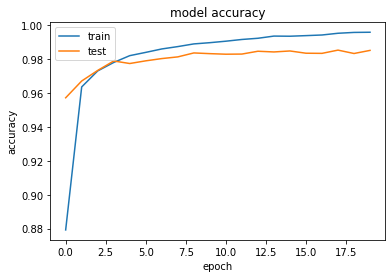

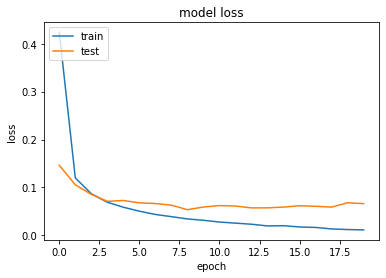

In [ ]:
score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Saving and Loading a Network CNN
-------------

It is possible to save the configuration of a specific network model in a JSON file format. This will also allow a later, faster reloading of the model and its training, as in the example below. 

In [ ]:
from keras.models import model_from_json

#Creatinon of of the model configuration in jsom format
json_string = model.to_json()

#model reconstruction from json format
model = model_from_json(json_string)

# Now let's compile, summarise and then train/fit the model.
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

# let's reduce the number of epoch to 3, for a faster test of the checkpoint utility
N_EPOCH = 3


history = model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)




CNN: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 20)         14020     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 20)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 10)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 50)         12550     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 50)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175)               0

Checkpoints
-------------

Another important utility in Keras is the saving of the trained weights of the network at the end of the training, or at specific timesteps called checkpoints. This will permit, for example, (i) the continuation of the training at a later stage starting from the saved checkpoint weights, (ii) the later inspection of the network performance at the chosen checkpoints, (iii) the saving of the weights of the best version during the training, e.g. for a specified accuracy value.



**Saving weights at the end of the training**

The first example below shows how to save the weighst at the end of the training.

In [ ]:
from keras.models import load_model 

#This saves the weights at the last epoch of the previous training session
model.save('my_model.LeNet')
print ('Weights saved for final epoch ', N_EPOCH)
print ('Check that there is a weight file in your folder')

#This loads the weight file 'my_model.LeNet'
model = load_model('my_model.LeNet')
print ('Loading of the saved weights and test using these trained weights')

# let's check that the weighst loaded in this examples have kept the trained state of the network.
score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])


Weights saved for final epoch  3
Check that there is a weight file in your folder
Loading of the saved weights and test using these trained weights
10000/10000 [==============================] - 1s 120us/step

Test score/loss: 0.06308073911508545
Test accuracy: 0.9793000221252441


**Regular checkpoint saving**

This example shows how to save the weights at regular inverval checkpoints. The default value for the __ModelCheckpoint__ functiion is every 1 epoch.

In [ ]:
# additional checkpoint load code and temp directory definition
from keras.callbacks import ModelCheckpoint
from keras.models import load_model 
import os
MODEL_DIR = "./tmp"

# let's reduce the number of epoch to 3, for a faster test of the checkpoint utility
N_EPOCH = 3


# definition of checkpoint parameters file
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "my_model-{epoch:02d}.LeNet"))

print ('Training with checkpoint at each epoch. Check that at the end of each epoch, there is a weight file in the tmp folder')
model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=0.5, callbacks=[checkpoint])

score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Let's load the weights of the 2nd epoch, and check the scores 
model = load_model(os.path.join(MODEL_DIR,'my_model-02.LeNet'))
print ('Weights loaded for epoch 2 .')
print ('New test using these trained weights.')

# let's check that the weights loaded in this examples have kept the trained state of the network.
score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])




Training with checkpoint at each epoch. Check that at the end of each epoch, there is a weight file in the tmp folder
Train on 30000 samples, validate on 30000 samples
Epoch 1/3
30000/30000 [==============================] - 10s 341us/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0590 - val_accuracy: 0.9811
Epoch 2/3
30000/30000 [==============================] - 11s 364us/step - loss: 0.0445 - accuracy: 0.9856 - val_loss: 0.0589 - val_accuracy: 0.9824
Epoch 3/3
10000/10000 [==============================] - 1s 124us/step

Test score/loss: 0.057427219665329904
Test accuracy: 0.982699990272522
Weights loaded for epoch 2 .
New test using these trained weights.
10000/10000 [==============================] - 1s 105us/step

Test score/loss: 0.0567632404549513
Test accuracy: 0.9824000000953674


Using TensorBoard to Visualise CNN Performance
-------------

Keras provides a callback for saving the training and test metrics, as well as the activation histograms for the different layers in the model.

The saved data can then be visualized with the TensorBoad launched at the command line:

   

In [ ]:
from keras.callbacks import TensorBoard

N_EPOCH = 20

#keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=0.5, callbacks=[tensorboard])

# Launch of TensorBoard to visualise the performance of the mdoel using the saved data


# Launch tensorboard in colab:
%load_ext tensorboard
%tensorboard --logdir ./logs

# or launch tensorboard if you're running the exercise in your computer
#!tensorboard "--logdir=./logs" --host localhost --port 6006
# Launch Chrome browser and go to localhost:6006 to view tensorboard


Train on 30000 samples, validate on 30000 samples
Epoch 1/4
30000/30000 [==============================] - 10s 328us/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 2/4
30000/30000 [==============================] - 13s 447us/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 3/4
30000/30000 [==============================] - 10s 338us/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 4/4
30000/30000 [==============================] - 10s 335us/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0617 - val_accuracy: 0.9824
Traceback (most recent call last):
  File "/Users/cangela/Library/Python/3.7/bin/tensorboard", line 10, in <module>
    sys.exit(run_main())
  File "/Users/cangela/Library/Python/3.7/lib/python/site-packages/tensorboard/main.py", line 59, in run_main
    default.get_plugins() + default.get_dynamic_plugins(),
  File "/Users/cangela/Library/Python/3.7/lib/py

Conclusions
-------------

We have learned to train our first, real __deep__ neural network, using the well known LeCun CNN for the MNIST dataset. Later we will explore the use of deeper networks and more complex dataset.

**Copyright (c)** 2019 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing